<a href="https://colab.research.google.com/github/itsaniketrathod/Capstone-Project-EDA/blob/main/AirBnB_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis on AirBnB Booking**

#### **Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.**

#### **This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values**

##### **Importing Libraries**

In [1]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

##### **Mounting Drive**

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### **Importing Dataset**

In [3]:
# Importing the dataset
airbnb_df = pd.read_csv('/content/drive/My Drive/Capstone Projects/Airbnb NYC 2019.csv')

In [4]:
airbnb_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [5]:
airbnb_df.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

In [6]:
# Information of the dataframe with features we will be using
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# Shape of the dataframe
airbnb_df.shape

(48895, 16)

In [8]:
# Columns in the Dataframe
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# **Data Cleaning and Preprocessing**

### **Handling Missing Values**

In [9]:
# Columns with NaN values
airbnb_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

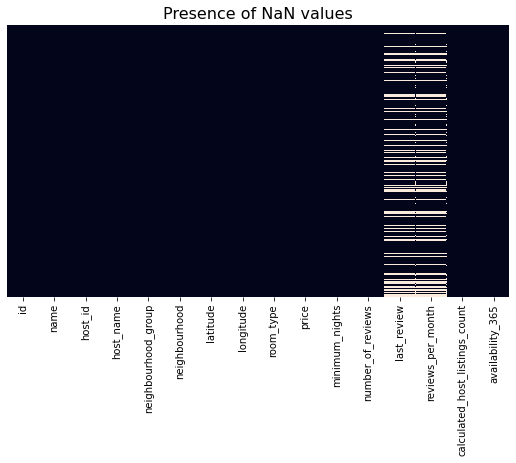

In [10]:
# Representing NaN values in heatmap
plt.figure(figsize=(9,5))
sns.heatmap(airbnb_df.isnull(),yticklabels=False,cbar=False)
plt.title("Presence of NaN values", size=16)
plt.show()

In [11]:
# Representing NaN values in tabular form
missing_values_df=(pd.DataFrame(airbnb_df.isna().sum())).reset_index()
missing_values_df.drop([4,5,6,7,8],axis=0,inplace=True)
missing_values_df.rename(columns={'index':"Column Name",0:'NaN Values'},inplace=True)
missing_values_df

Column Name  NaN Values
0                               id           0
1                             name          16
2                          host_id           0
3                        host_name          21
9                            price           0
10                  minimum_nights           0
11               number_of_reviews           0
12                     last_review       10052
13               reviews_per_month       10052
14  calculated_host_listings_count           0
15                availability_365           0

In [12]:
# Filling the NaN values
airbnb_df['name'].fillna('Unavailable',inplace= True)
airbnb_df['host_name'].fillna('Unavailable',inplace= True)
airbnb_df['last_review'].fillna('2019-12-31',inplace = True)
airbnb_df['reviews_per_month'].fillna(0.0, inplace = True)

In [13]:
# Correcting date format in 'last_review' column
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])

In [14]:
# Checking NaN values
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

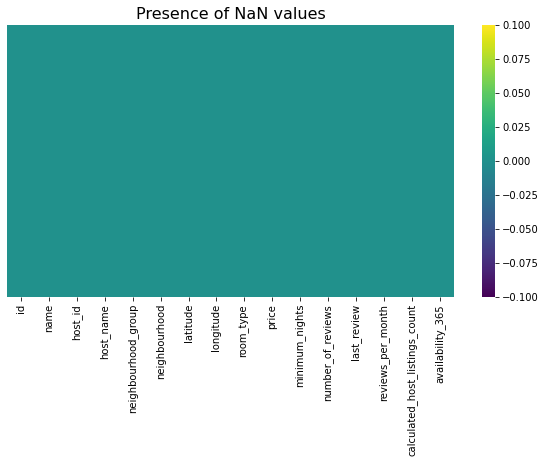

In [15]:
# Representing NaN values in heatmap
plt.figure(figsize=(10,5))
sns.heatmap(airbnb_df.isnull(),yticklabels=False,cmap='viridis')
plt.title("Presence of NaN values", size=16)
plt.show()

# **Data Visualization**

### **Top Neighbourhood Group**

In [16]:
# Top Neighbourhood Group
top_neighbourhood_group = pd.DataFrame(airbnb_df['neighbourhood_group'].value_counts().reset_index())
top_neighbourhood_group.rename(columns={'index':"Neighbourhood Group","neighbourhood_group":'Total Listings'},inplace=True)

<function matplotlib.pyplot.show(*args, **kw)>

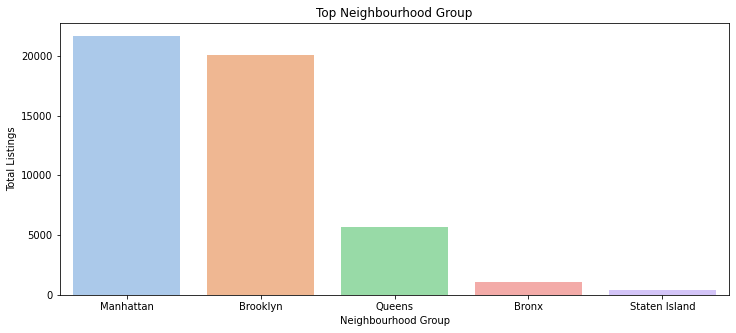

In [17]:
plt.figure(figsize=(12,5))
sns.barplot(x='Neighbourhood Group',y='Total Listings',data=top_neighbourhood_group,palette='pastel')
plt.title("Top Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Total Listings")
plt.show

### **Top 10 neighbourhood**

In [18]:
# Top 10 neighbours

top_ten_neighbourhood = pd.DataFrame(airbnb_df['neighbourhood'].value_counts().reset_index()[:10])
top_ten_neighbourhood.rename(columns={'index':"Neighbourhood","neighbourhood":'Total Listings'},inplace=True)

In [19]:
plt.figure(figsize=(16,6))
sns.barplot(x='Neighbourhood',y='Total Listings',data=top_ten_neighbourhood,palette='pastel')
plt.title("Top 10 Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Total Listings")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

### **Popular Room Types**


In [20]:
most_booked_room_type = pd.DataFrame(airbnb_df['room_type'].value_counts().reset_index()[:10])
most_booked_room_type.rename(columns={'index':"Room Type","room_type":'Popularity'},inplace=True)

In [21]:
most_booked_room_type

Room Type  Popularity
0  Entire home/apt       25409
1     Private room       22326
2      Shared room        1160

<function matplotlib.pyplot.show(*args, **kw)>

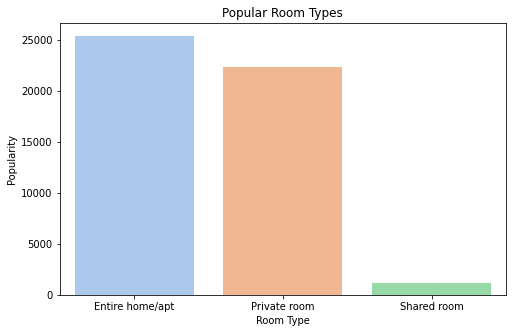

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x='Room Type',y='Popularity',data=most_booked_room_type,palette='pastel')
plt.title("Popular Room Types")
plt.xlabel("Room Type")
plt.ylabel("Popularity")
plt.show

### **Price Range**

In [23]:
airbnb_df['price_range'] = airbnb_df['price'].apply(lambda x : '0-50'  
                                                    if x <= 50 else ('51-100' 
                                                    if 51 < x <= 100 else ('101-150' 
                                                    if 101 < x <= 150 else ('150-200' 
                                                    if 150 < x <= 200 else ('200+')))))

<function matplotlib.pyplot.show(*args, **kw)>

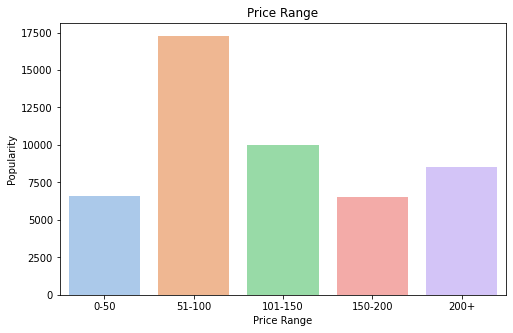

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(data = airbnb_df,order=('0-50','51-100','101-150','150-200','200+'), x = 'price_range',palette='pastel')
plt.title("Price Range")
plt.xlabel("Price Range")
plt.ylabel("Popularity")
plt.show

### **Busiest Hosts**

In [25]:
busiest_hosts_top_ten =airbnb_df.groupby(['host_id','host_name','room_type'])['number_of_reviews'].max().reset_index().sort_values(by='number_of_reviews',ascending=False).head(10)
busiest_hosts_top_ten

host_id host_name        room_type  number_of_reviews
24497  47621202      Dona     Private room                629
7710    4734398        Jj     Private room                607
22225  37312959      Maya     Private room                543
4593    2369681     Carol     Private room                540
19453  26432133  Danielle     Private room                510
13714  12949460       Asa  Entire home/apt                488
1976     792159     Wanda     Private room                480
5059    2680820     Linda     Private room                474
161       42273      Dani  Entire home/apt                467
18297  23591164    Angela     Private room                466

<function matplotlib.pyplot.show(*args, **kw)>

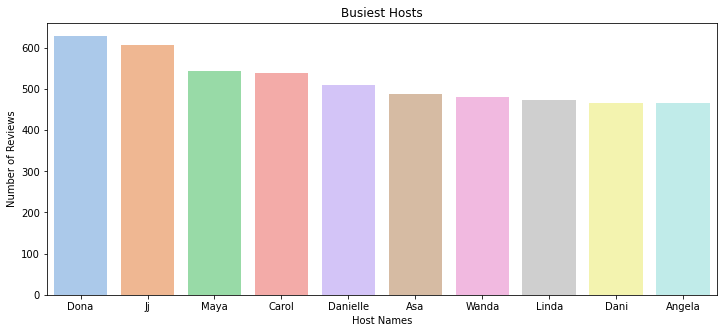

In [26]:
plt.figure(figsize=(12,5))
sns.barplot(data=busiest_hosts_top_ten,x='host_name',y='number_of_reviews',palette='pastel')
plt.title("Busiest Hosts")
plt.xlabel("Host Names")
plt.ylabel("Number of Reviews")
plt.show

### **Room Type vs Neighbourhood Group**

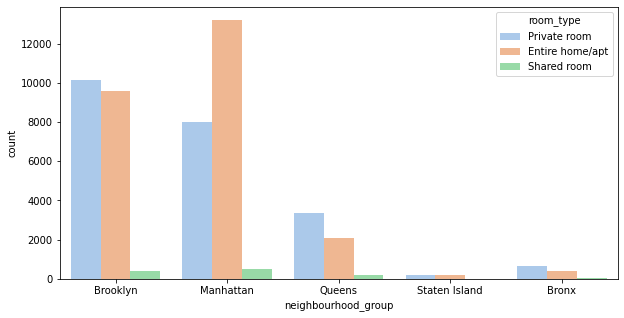

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data = airbnb_df, hue = 'room_type', x = 'neighbourhood_group',palette='pastel')

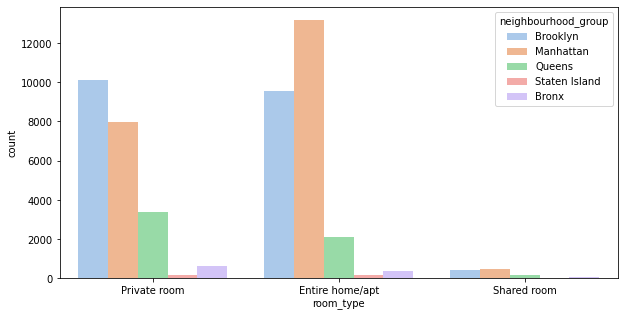

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data = airbnb_df, x = 'room_type', hue = 'neighbourhood_group',palette='pastel')

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x360 with 0 Axes>

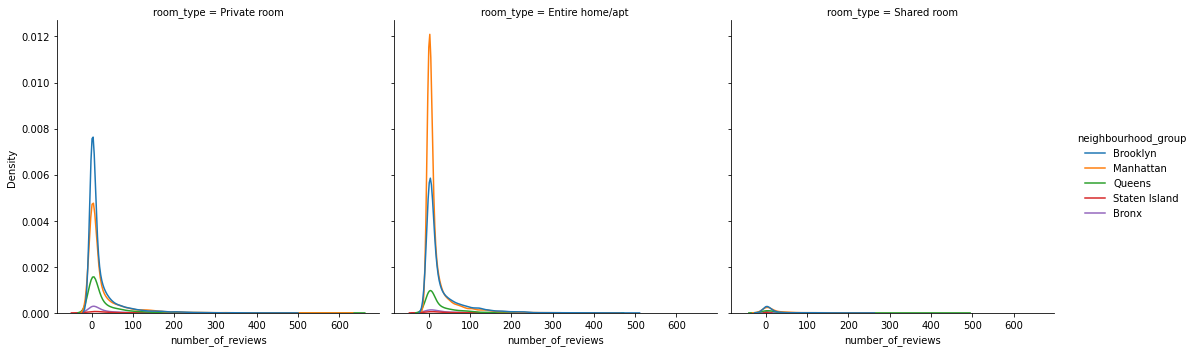

In [51]:
plt.figure(figsize=(12,5))
sns.displot(x='number_of_reviews',data=airbnb_df,col='room_type',hue='neighbourhood_group',kind='kde')
plt.show

In [29]:
airbnb_df

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2      2019-12-31               0.00                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890  2019-12-31               0.00                               2   
48891  2019-12-31               0.00                               2   
48892  2019-12-31               0.00                               1   
48893  2019-12-31               0.00                               6   
48894  2019-12-31               0.00                               1   

       availability_365 price_range  
0                   365     101-150  
1                   355        200+  
2                   365     101-150  
3                   194      51-100  
4                     0      51-100  
...                 ...         ...  
48890                 9      51-100  
48891                36        0-50  
48892  

### **Price Analysis in Neighbourhood Group**

In [30]:
airbnb_df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [31]:
prices_in_neighbourhood_group = airbnb_df.groupby(['neighbourhood_group'])['price'].agg(['min', 'max','median','mean']).reset_index()
prices_in_neighbourhood_group

neighbourhood_group  min    max  median        mean
0               Bronx    0   2500    65.0   87.496792
1            Brooklyn    0  10000    90.0  124.383207
2           Manhattan    0  10000   150.0  196.875814
3              Queens   10  10000    75.0   99.517649
4       Staten Island   13   5000    75.0  114.812332

<function matplotlib.pyplot.show(*args, **kw)>

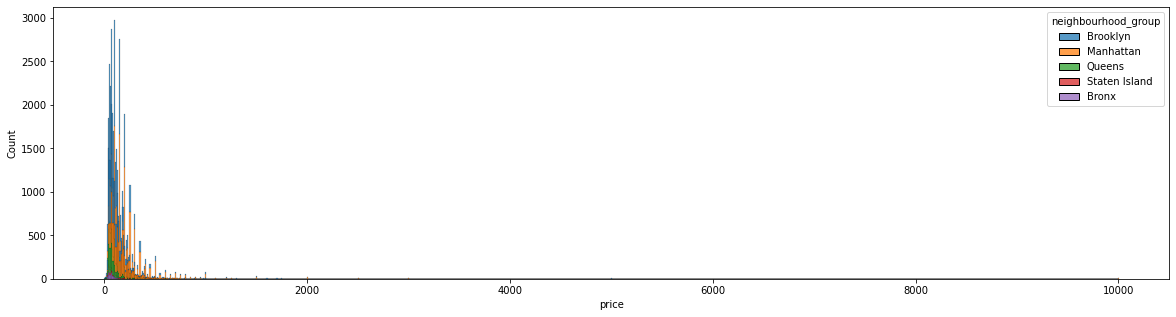

In [32]:
plt.figure(figsize=(20,5))
sns.histplot(data=airbnb_df, x="price",hue="neighbourhood_group", multiple="stack",shrink=2)
plt.show

* From above data plot we can notice that most of listings are priced less than 1000 dollars
* Listings priced greated than 1000 dollars must be either super luxurios or there can an error during input.
* Since these records are skewing our data, we can treat them as outliers and drop them.


In [33]:
min_thresold, max_thresold = airbnb_df.price.quantile([0.01,0.995])
min_thresold, max_thresold

(30.0, 1000.0)

In [34]:
airbnb_df2 = airbnb_df[(airbnb_df.price>min_thresold)&(airbnb_df.price<max_thresold)]
airbnb_df2.shape

(47938, 17)

In [35]:
airbnb_df2.price.describe(percentiles=[.25, .5, .75,.95])

count    47938.000000
mean       141.806062
std        112.876602
min         31.000000
25%         70.000000
50%        109.000000
75%        175.000000
95%        350.000000
max        999.000000
Name: price, dtype: float64

* Since 95% of the listings are priced less than 350, we can take 350 as a threshold for price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Neighbourhood Group')

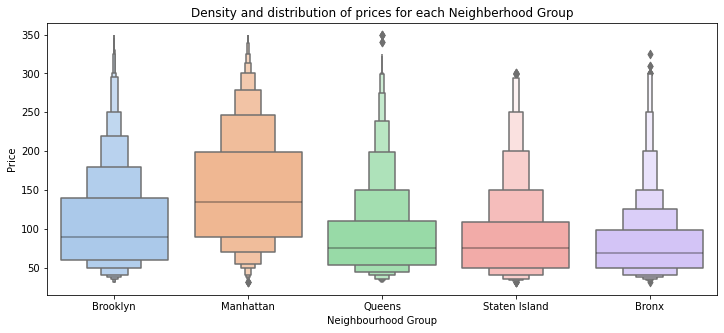

In [36]:
airbnb_df_updated_price = airbnb_df2[airbnb_df.price  < 350]
plt.figure(figsize=(12,5))
sns.boxenplot(x='neighbourhood_group', y='price', data= airbnb_df_updated_price , palette = 'pastel')
plt.title('Density and distribution of prices for each Neighberhood Group')
plt.ylabel('Price')
plt.xlabel('Neighbourhood Group')

Text(0.5, 0, 'Price')

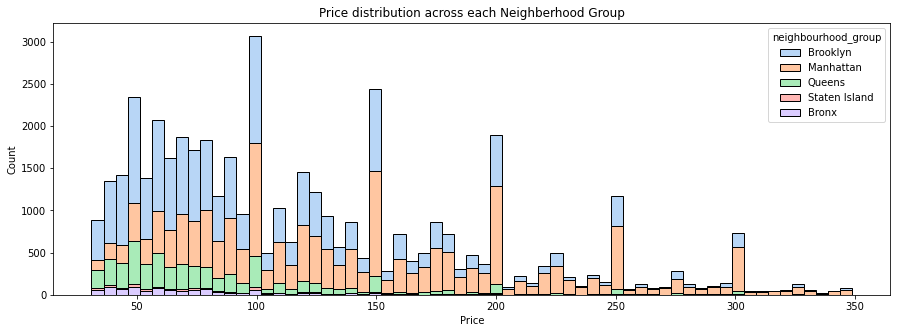

In [37]:
plt.figure(figsize=(15,5))
sns.histplot(data=airbnb_df_updated_price, x="price", hue="neighbourhood_group",multiple="stack",palette = 'pastel')
plt.title('Price distribution across each Neighberhood Group')
plt.ylabel('Count')
plt.xlabel('Price')

In [38]:
fig = px.scatter_mapbox(airbnb_df_updated_price,
                        lon=airbnb_df_updated_price['longitude'],
                        lat=airbnb_df_updated_price['latitude'],
                        size_max=25,
                        zoom=9.5,
                        color = airbnb_df_updated_price['price'],
                        hover_name="name",
                        width = 700,
                        height = 600,
                        title = 'Distribution of prices in Neighberhood Group')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":10})
fig.show()

### **Price Vs Neighbourhood Group(Barplot)**

In [39]:
prices_in_neighbourhood_group = airbnb_df_updated_price.groupby(['neighbourhood_group'])['price'].mean().reset_index().sort_values(by='price',ascending=False).head(10)
prices_in_neighbourhood_group

neighbourhood_group       price
2           Manhattan  147.411132
1            Brooklyn  107.530884
4       Staten Island   92.111748
3              Queens   90.946805
0               Bronx   80.794616

<function matplotlib.pyplot.show(*args, **kw)>

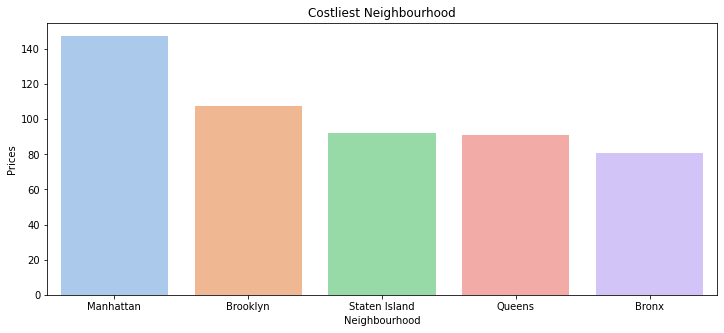

In [40]:
plt.figure(figsize=(12,5))
sns.barplot(data=prices_in_neighbourhood_group,x='neighbourhood_group',y='price',palette='pastel')
plt.title("Costliest Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Prices")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

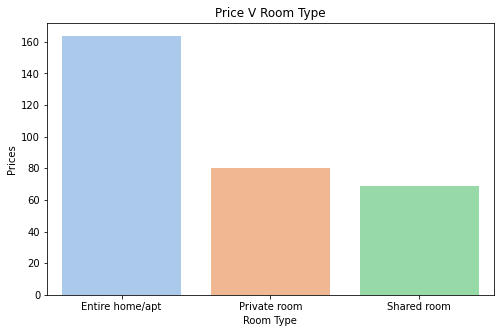

In [63]:
plt.figure(figsize=(8,5))
room_type_prices = airbnb_df_updated_price.groupby("room_type")["price"].mean().reset_index().sort_values(by='price',ascending=False)
sns.barplot(data=room_type_prices,x='room_type',y='price',palette='pastel')
plt.title("Price V Room Type")
plt.xlabel("Room Type")
plt.ylabel("Prices")
plt.show

### **Neighbourhood Group vs Number of Reviews**

In [41]:
number_of_reviews_in_neighbourhood_group = airbnb_df.groupby(['neighbourhood_group'])['number_of_reviews'].sum().reset_index()
number_of_reviews_in_neighbourhood_group

neighbourhood_group  number_of_reviews
0               Bronx              28371
1            Brooklyn             486574
2           Manhattan             454569
3              Queens             156950
4       Staten Island              11541

<function matplotlib.pyplot.show(*args, **kw)>

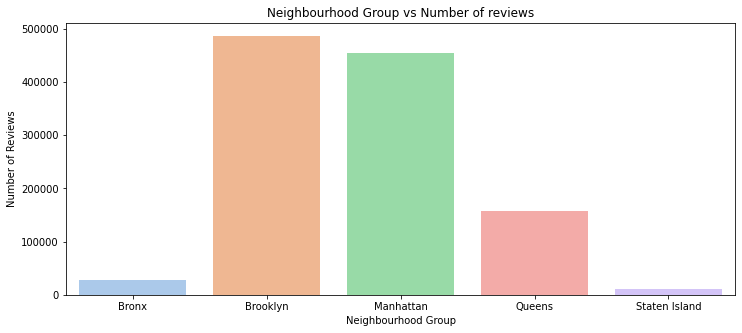

In [42]:
plt.figure(figsize=(12,5))
sns.barplot(x='neighbourhood_group',y='number_of_reviews',data=number_of_reviews_in_neighbourhood_group,palette='pastel')
plt.title("Neighbourhood Group vs Number of reviews")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Reviews")
plt.show

* Although number of listings are higher in ***Manhatten***, number of reviews are higher in ***Brooklyn***
* Which may be because of price difference between this two neighbourhood

#### **Price Vs Number Of Reviews**

In [43]:
# Price Vs Number Of Reviews
plt.figure(figsize=(12,5))
sns.scatterplot(x='price',y='number_of_reviews',data=airbnb_df_updated_price,hue='neighbourhood_group')
plt.title("Price Vs Number Of Reviews")
plt.xlabel("Price")
plt.ylabel("Number Of Reviews")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1296x1296 with 0 Axes>

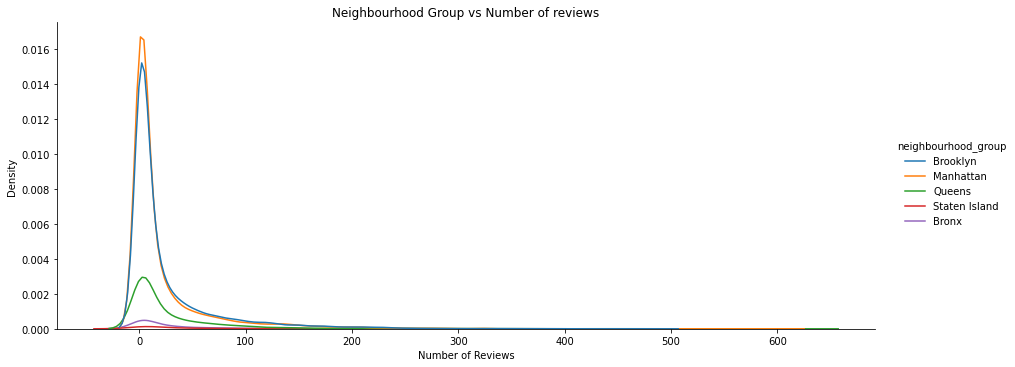

In [44]:
plt.figure(figsize=(18,18))
sns.displot(data=airbnb_df_updated_price,x='number_of_reviews',hue="neighbourhood_group",kind='kde',warn_singular=False,height=5, aspect=2.5)
plt.title("Neighbourhood Group vs Number of reviews")
plt.xlabel("Number of Reviews")
# plt.ylabel("Number of Reviews")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x360 with 0 Axes>

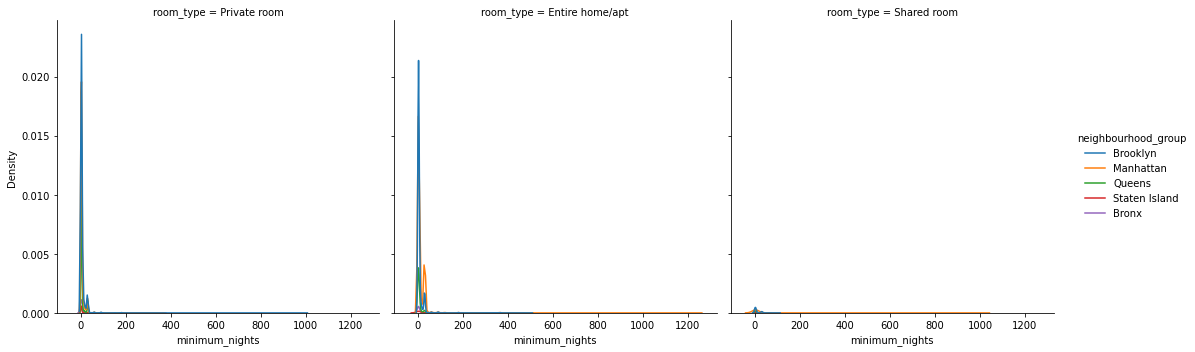

In [52]:
# Number Of Reviews in Each Neighbourhood with respect to Room Types
plt.figure(figsize=(12,5))
sns.displot(x='minimum_nights',data=airbnb_df_updated_price,col='room_type',hue='neighbourhood_group',kind='kde')
# plt.title("Price Vs Number Of Reviews")
# plt.xlabel("Price")
# plt.xlabel("Number Of Reviews")
plt.show

#### **Price Vs Reviews Per Month**

In [46]:
# Price Vs Reviews Per Month
plt.figure(figsize=(12,5))
sns.scatterplot(x='price',y='reviews_per_month',data=airbnb_df_updated_price,hue='neighbourhood_group')
plt.title("Price Vs Reviews Per Month")
plt.xlabel("Price")
plt.ylabel("Reviews Per Month")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [47]:
plt.figure(figsize=(18,18))
sns.displot(data=airbnb_df_updated_price,x='reviews_per_month',hue="neighbourhood_group",kind='kde',warn_singular=False,height=5, aspect=2.5)
plt.title("Price Vs Reviews Per Month")
plt.xlabel("Price")
plt.ylabel("Reviews Per Month")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1296x1296 with 0 Axes>

<function matplotlib.pyplot.show(*args, **kw)>

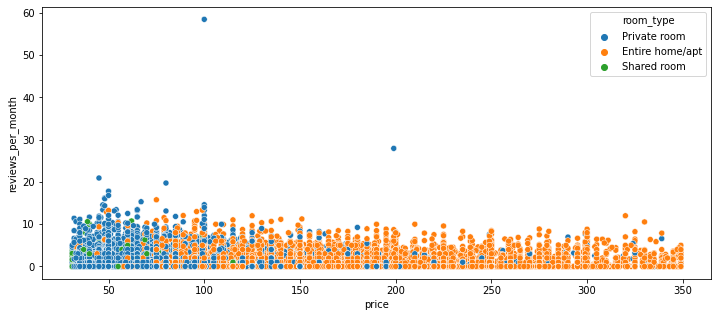

In [48]:
# Price Vs Reviews Per Month
plt.figure(figsize=(12,5))
sns.scatterplot(x='price',y='reviews_per_month',data=airbnb_df_updated_price,hue='room_type')
# plt.title("Price Vs Reviews Per Month")
# plt.xlabel("Price")
# plt.ylabel("Reviews Per Month")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1296x1296 with 0 Axes>

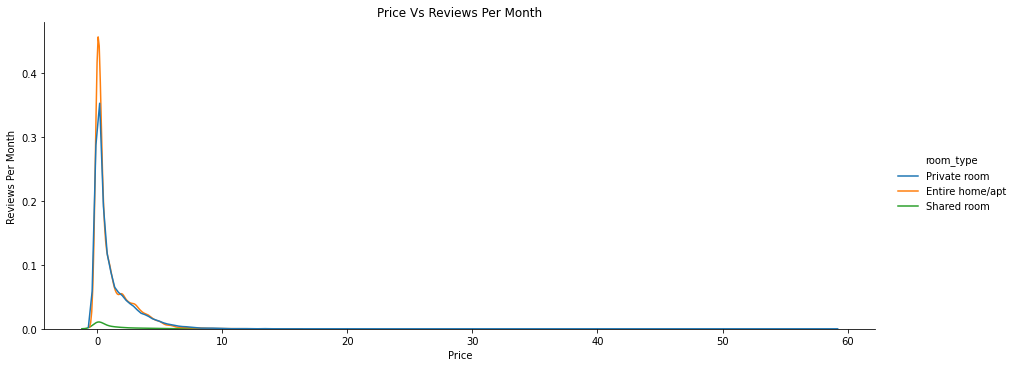

In [49]:
plt.figure(figsize=(18,18))
sns.displot(data=airbnb_df_updated_price,x='reviews_per_month',hue="room_type",kind='kde',warn_singular=False,height=5, aspect=2.5)
plt.title("Price Vs Reviews Per Month")
plt.xlabel("Price")
plt.ylabel("Reviews Per Month")
plt.show

#### **Location Vs Availability**

In [50]:
fig = px.scatter_mapbox(airbnb_df_updated_price,
                        lon=airbnb_df_updated_price['longitude'],
                        lat=airbnb_df_updated_price['latitude'],
                        size_max=25,
                        zoom=9.5,
                        color = airbnb_df_updated_price['availability_365'],
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        hover_name="name",
                        width = 700, 
                        height = 600,
                        title = 'Availabilty')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":10})
fig.show()

In [68]:
airbnb_df_updated_price["minimum_nights"].describe()

count    45399.000000
mean         6.936342
std         19.892778
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [69]:
airbnb_df_updated_price["minimum_nights"].hist()

In [70]:
airbnb_df_updated_price["minimum_nights"][airbnb_df_updated_price["minimum_nights"] < 10].hist()

In [71]:
airbnb_df_updated_price['price'].corr(airbnb_df_updated_price['minimum_nights'])

0.03273530081654195

In [72]:
airbnb_df_updated_price["minimum_nights"][airbnb_df_updated_price["minimum_nights"] > 30]

6         45
14        90
36        60
81        31
106       90
        ... 
48325     60
48368     60
48446    365
48752     32
48784     45
Name: minimum_nights, Length: 674, dtype: int64

## **Conclusion**

  * Manhattan followed by Brooklyn are the busiest & popular neighbourhood group with high number of entries and number of reviews
  * Manhattan also is the **costliest** neighbourhood group with average price of **\$145** followed by Brooklyn with average price of **\$105**
  * Williamsburg is the popular neighbourhood followed by Bedford-Stuyvesant
  * "Entire home/apt" (25,409) are the most booked room types followed by "Private room" (22,326)
  * Most properties range in between \$50 - \$100 price range
  * Dona is the busiest host followed by JJ
  * Staten Island and Bronx listing have highest availability throughout the year
  * More than 37,000 hosts are available across New York City
